In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
dataset = {}
dataset["optimization"] = ['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '1hcd', '2ga5', '1j5u', '3o4d', '1k0s']
dataset["optimization_cath"] = ['1a75A00', '1bekA01', '1bqbA02', '1cpcB00', '1cscA02', '1cy5A00', '1dv5A00', '1e8yA05', '1evyA02', '1in4A03', '1l1fA03', '1vq8P01', '1xmkA00', '1zcaA02', '2grhA00', '2ii2A04', '2q6fB03', '2wh6A00', '3g0vA00', '3geuA00', '3h99A03', '3hrdD02', '3ju5A01', '3p1wA03', '4cxfA01', '4i2aA01', '4i4tB03', '4i6uB00', '5kn9A02']
dataset["optimization_v2"] = ['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '2ga5', '1j5u', '3o4d']


In [ ]:
folder_list = ["frag_mem_with_single_iter0_original", "frag_mem_with_single_multi_pfam_iter0_original"]
base_path = "/Users/weilu/Research/server/jan_2020"
run_n = 5
def read_simulation_info(folder_list, pdb_list, simulationType, base_path, run_n):
    all_data = []
    for folder in folder_list:
        for pdb in pdb_list:
            for i in range(run_n):
                    pre = f"{base_path}/{simulationType}/{folder}/{pdb}/{i}"
                    info_file = "info.dat"
                    location = f"{pre}/{info_file}"
                    try:
                        tmp = pd.read_csv(location, sep="\s+")
                        tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                        all_data.append(tmp)
                    except:
                        print(pdb, i, folder)
                        pass
    data = pd.concat(all_data)
    today = datetime.today().strftime('%m-%d')
    outFile = f"{simulationType}_{folder}_{today}.csv"
    data.reset_index(drop=True).to_csv(outFile)
    print(outFile)
    return data

In [95]:
pdb_list = dataset["optimization_v2"]
simulationType = "iterative_optimization"
# folder = "original"
# folder = "first"
# folder = "second_withoutExclusion"
# folder_list = ["first", "second_withoutExclusion"]
# "first", 
folder_list = ["frag_mem_with_single_iter0_original", "frag_mem_with_single_multi_pfam_iter0_original"]
all_data = []
for folder in folder_list:
    for pdb in pdb_list:
        for i in range(5):
                pre = f"/Users/weilu/Research/server/jan_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/iterative_optimization_frag_mem_with_single_multi_pfam_iter0_original_01-19.csv


In [96]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/iterative_optimization_frag_mem_with_single_multi_pfam_iter0_original_01-19.csv", index_col=0)
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

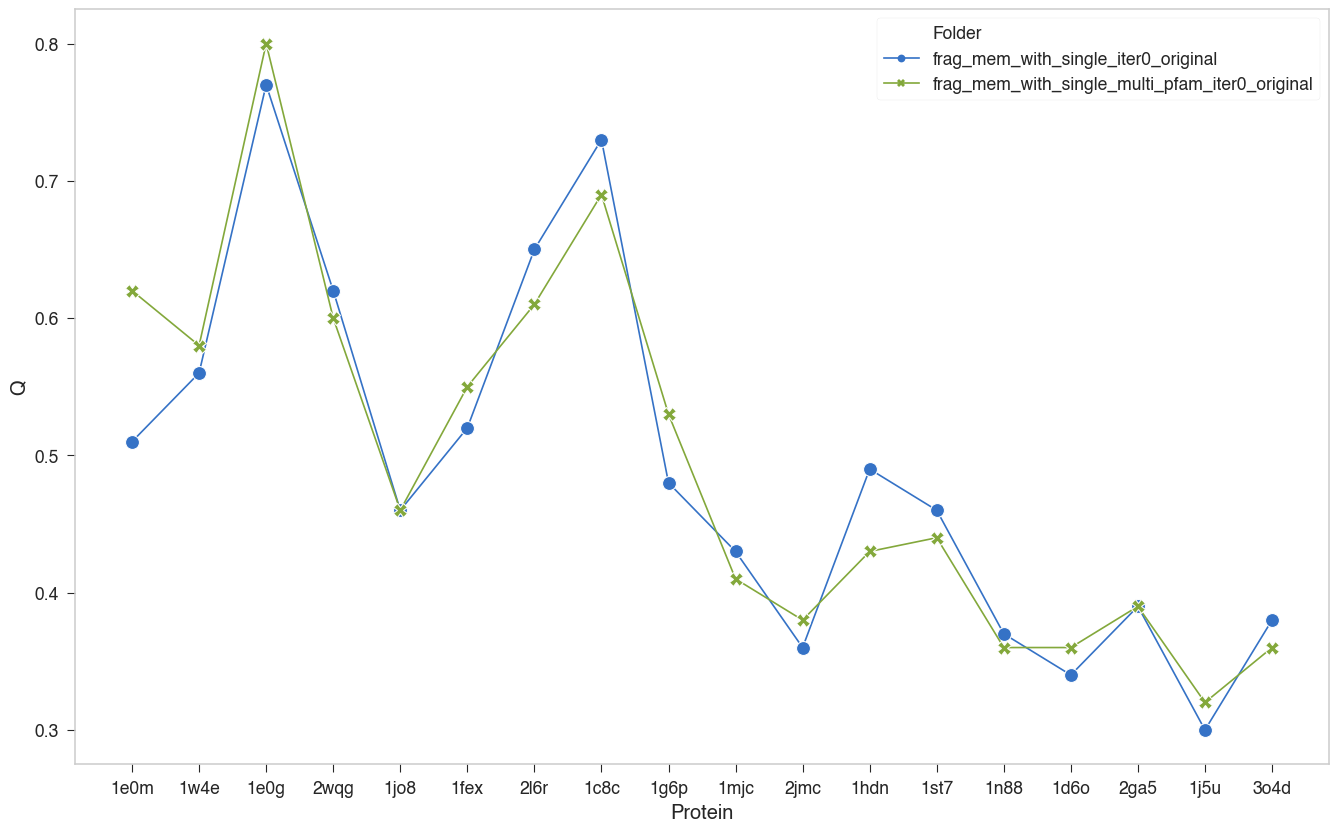

In [97]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter0_gpu' and Folder != 'iter0_8e6_gpu'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
# d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [91]:
pdb_list = dataset["optimization_v2"]
simulationType = "iterative_optimization"
# folder = "original"
# folder = "first"
# folder = "second_withoutExclusion"
# folder_list = ["first", "second_withoutExclusion"]
# "first", 
folder_list = ["iter0_gpu", "iter0_4e6_gpu", "iter0_8e6_gpu", "single_mem_iter7", "frag_mem_iter1", "frag_mem_iter2", "frag_mem_iter3"]
all_data = []
for folder in folder_list:
    for pdb in pdb_list:
        for i in range(10):
                pre = f"/Users/weilu/Research/server/jan_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/iterative_optimization_frag_mem_iter3_01-16.csv


In [92]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/iterative_optimization_frag_mem_iter3_01-16.csv", index_col=0)
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

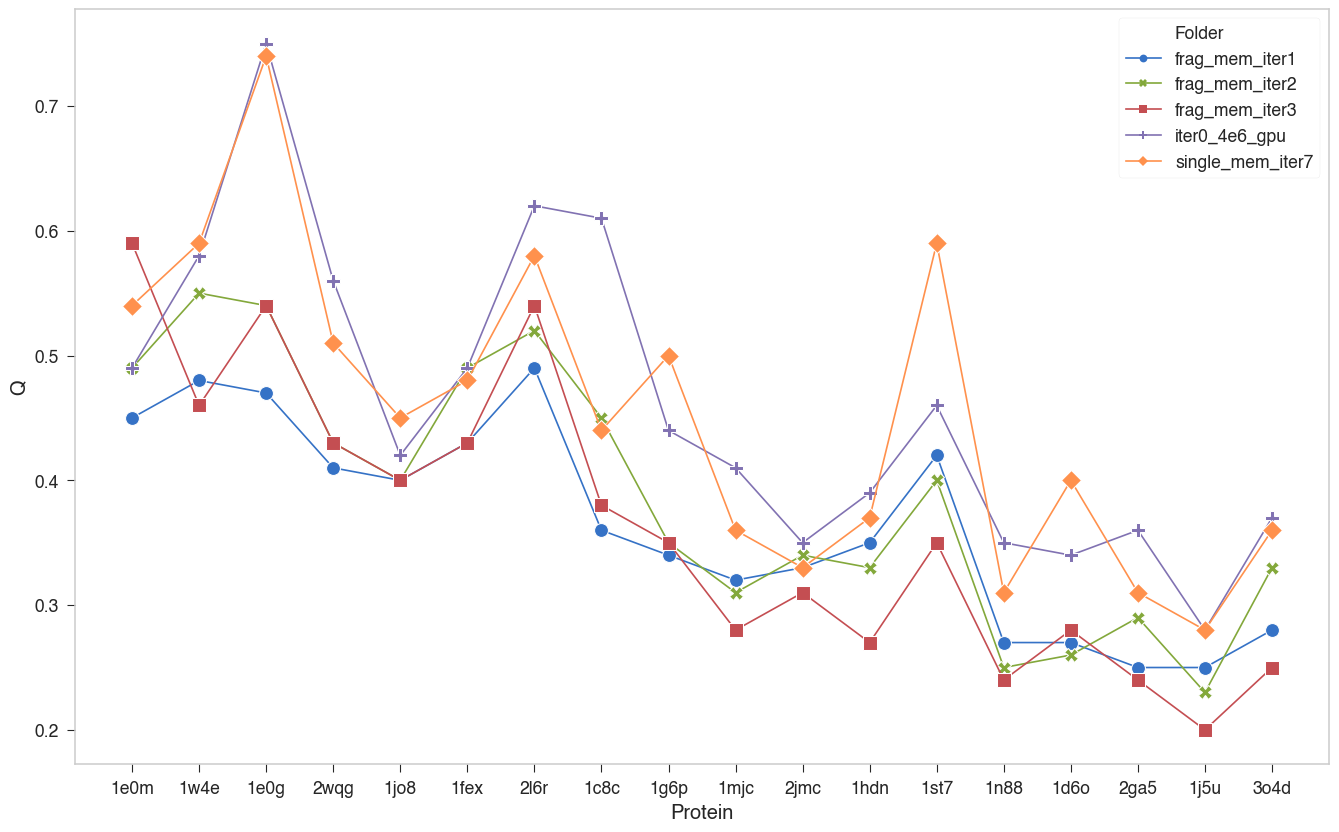

In [94]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter0_gpu' and Folder != 'iter0_8e6_gpu'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
# d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


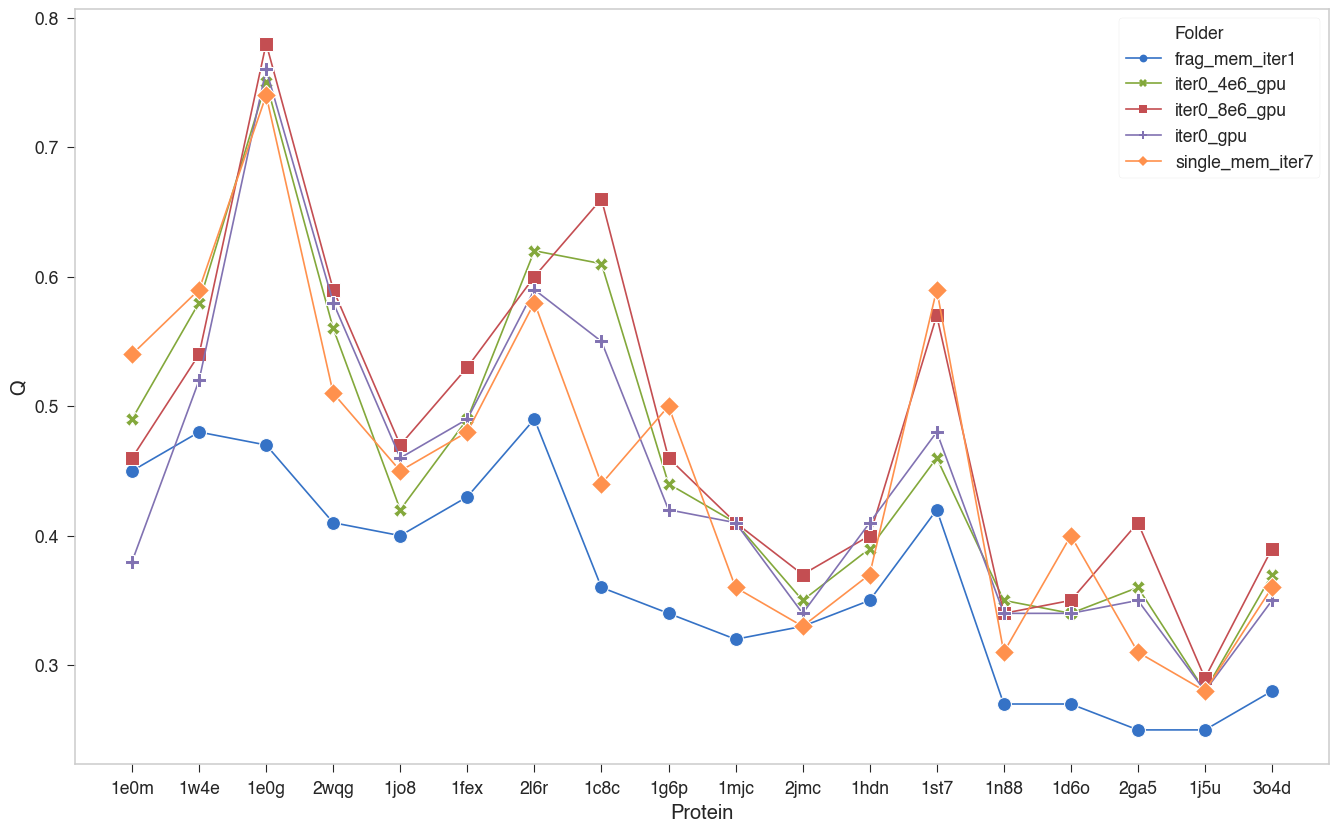

In [84]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
# d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


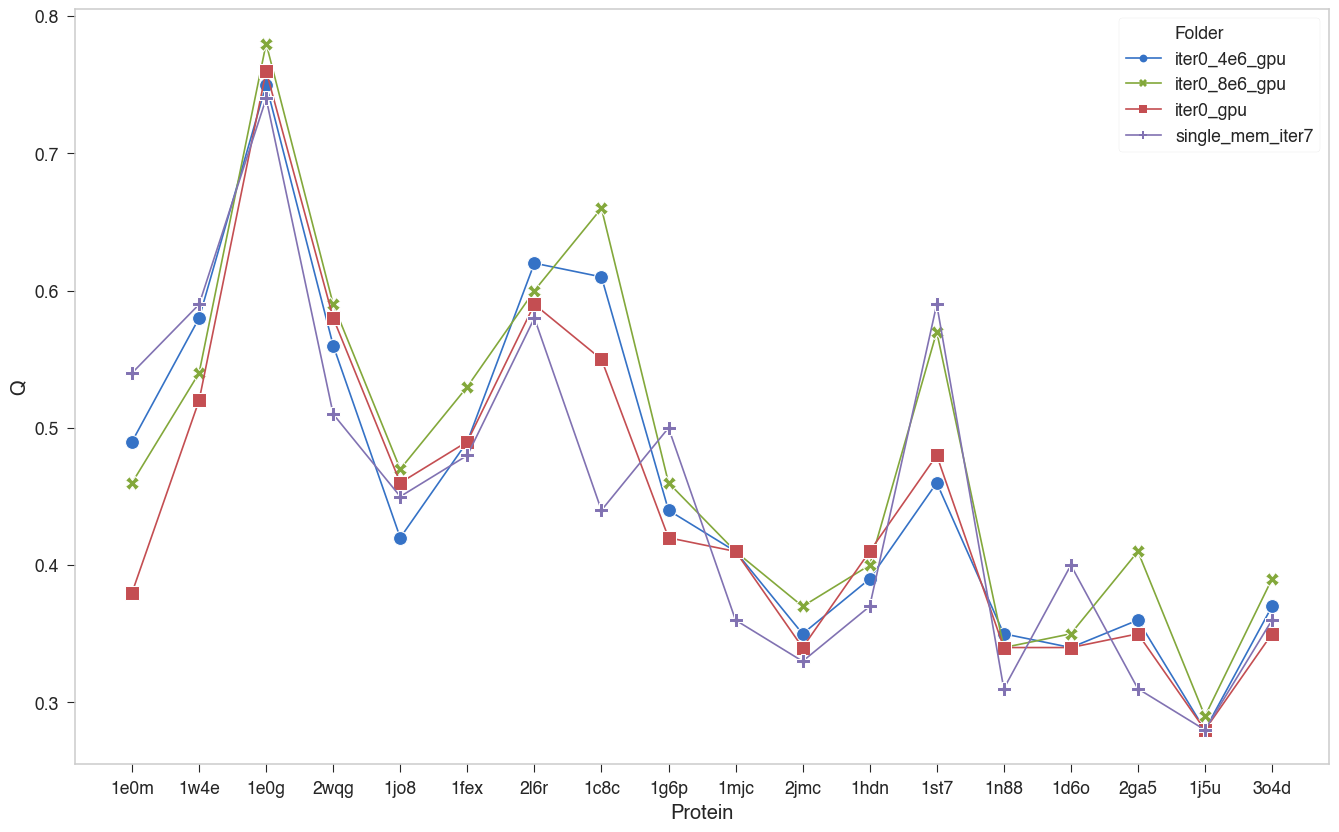

In [61]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
# d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


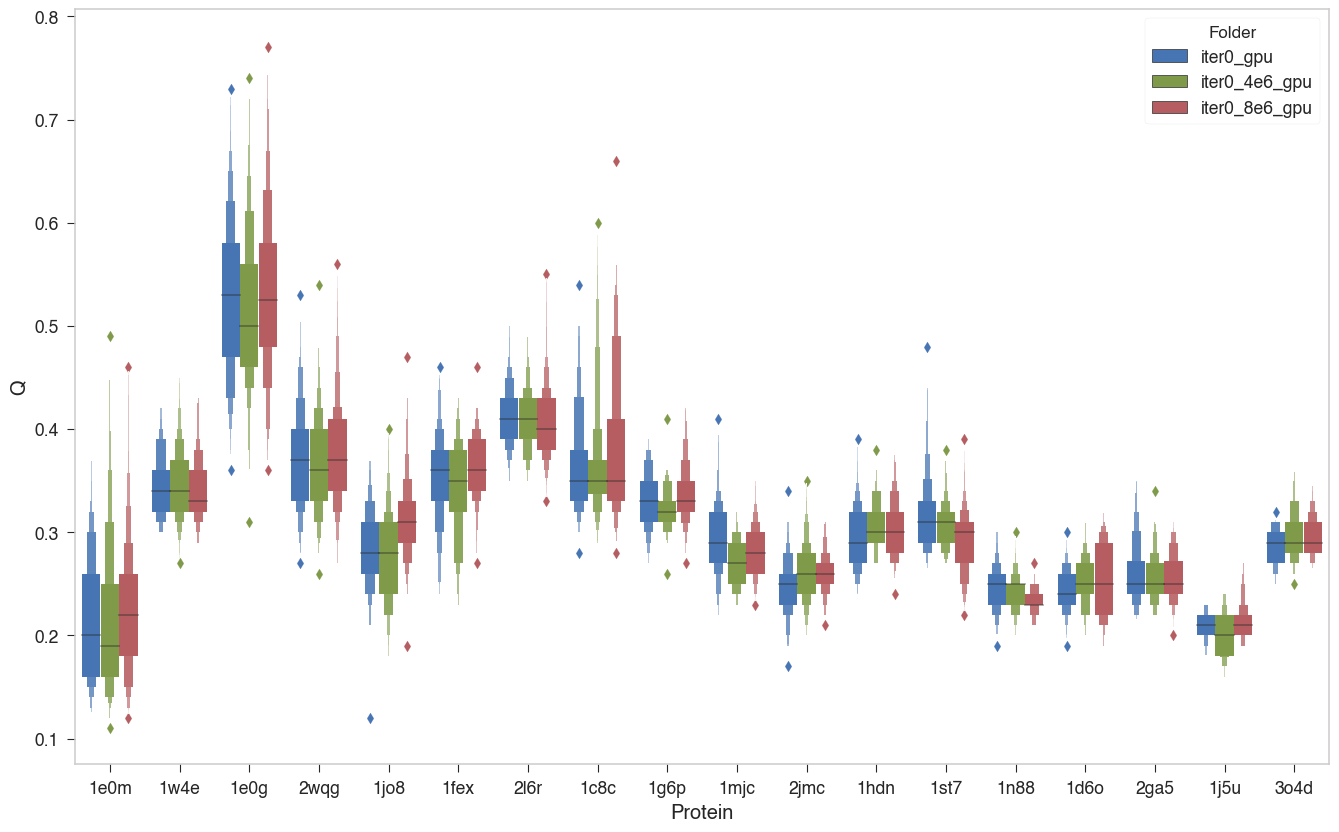

In [7]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Run", "Folder"]).tail(20)
ax = sns.boxenplot(x="Protein", y=y, hue="Folder", data=t)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


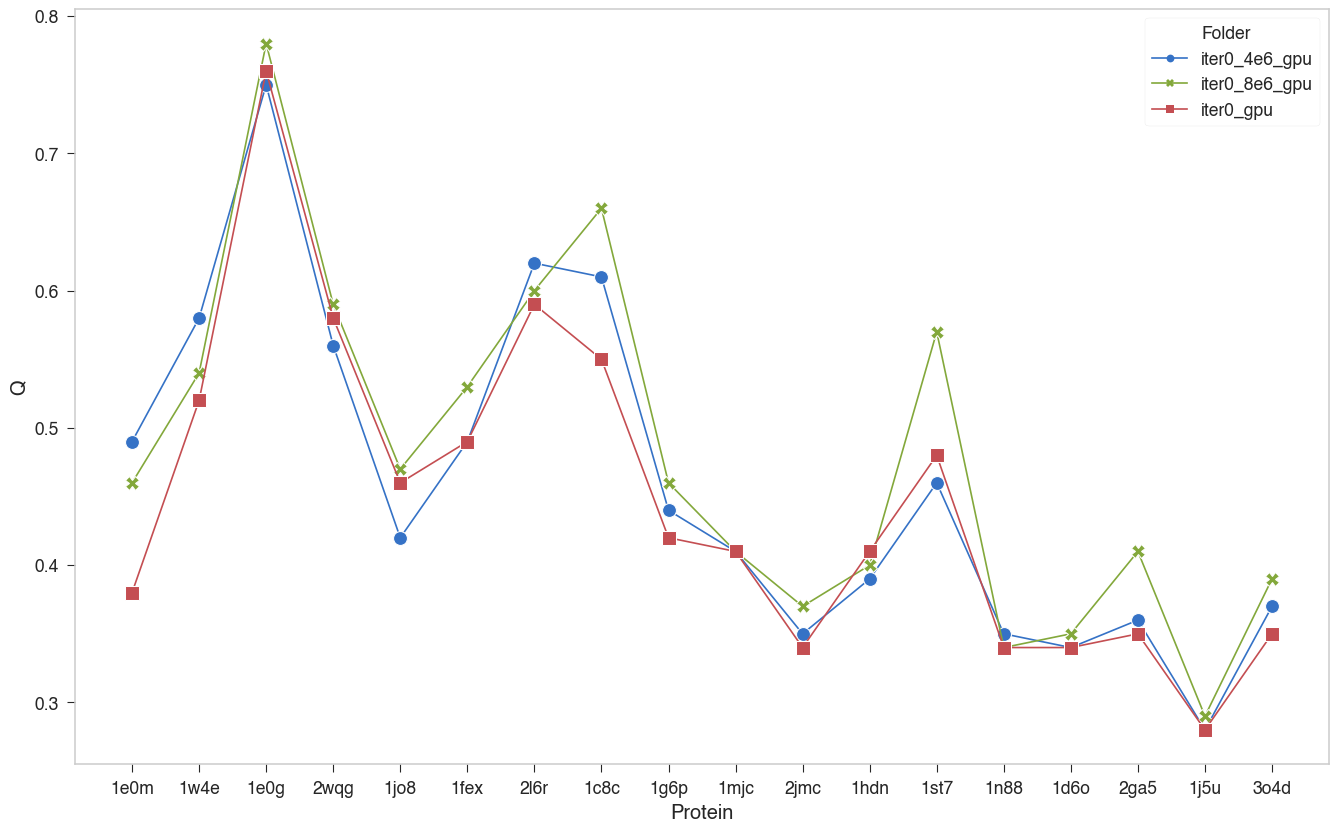

In [8]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
# d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [32]:
data = pd.read_pickle("/Users/weilu/Research/server/jan_2020/optimization/optimization_iter1/decoys/openMM/1e0m_iter0_4e6_gpu.pkl")

In [48]:
data.shape

(500, 18)

In [51]:
d1 = pd.read_pickle("/Users/weilu/Research/server/jan_2020/optimization/optimization_iter1/decoys/openMM/1e0m_iter0_gpu.pkl")

In [34]:
s = data["structure"].iloc[0]

In [35]:
a = list(s.get_residues())

In [39]:
len(list(s.get_atoms()))

213

In [41]:
len(list(s1.get_atoms()))

213

In [42]:
s

<Model id=950>

In [43]:
s1

<Model id=450>

In [44]:
s == s1

False

In [50]:
sys.getsizeof(data)

145604

In [45]:
sys.getsizeof(s)

56

In [46]:
sys.getsizeof(s1)

56

In [47]:
s

<Model id=950>

In [23]:
a = data.drop("structure", axis=1)

In [15]:
data["structure"].iloc[A-1]

<Model id=999>

In [24]:
a.to_pickle(f"/Users/weilu/Research/server/jan_2020/optimization/optimization_iter1/decoys/openMM/test2.pkl")

In [25]:
data = pd.read_pickle("/Users/weilu/Research/server/jan_2020/optimization/optimization_iter1/decoys/openMM/1e0m_iter0_gpu.pkl")

In [58]:
d1.tail(1).reset_index(drop=True).to_pickle(f"/Users/weilu/Research/server/jan_2020/optimization/optimization_iter1/decoys/openMM/test3_tail1.pkl")

In [ ]:
data.

In [57]:
data.tail(1).reset_index(drop=True)

,Steps,Qw,Rg,Backbone,Rama,Contact,Fragment,Membrane,ER,TBM_Q,Beta,Pap,Helical,Total,Run,Protein,Folder,structure
0,1001,0.15,19.29,100.66,-91.98,-28.34,-100.5,0.0,0.0,0.0,-0.0,0.0,0.0,-120.16,9,1e0m,iter0_4e6_gpu,"(((<Atom CA>, <Atom C>, <Atom O>, <Atom CB>), ..."


In [28]:
a = data.drop("structure", axis=1)
a.to_pickle(f"/Users/weilu/Research/server/jan_2020/optimization/optimization_iter1/decoys/openMM/test4.pkl")

In [29]:
s1 = data["structure"].iloc[0]

In [31]:
list(s1.get_residues())

[<Residue SER het=  resseq=1 icode= >,
 <Residue MET het=  resseq=2 icode= >,
 <Residue GLY het=  resseq=3 icode= >,
 <Residue LEU het=  resseq=4 icode= >,
 <Residue PRO het=  resseq=5 icode= >,
 <Residue PRO het=  resseq=6 icode= >,
 <Residue GLY het=  resseq=7 icode= >,
 <Residue TRP het=  resseq=8 icode= >,
 <Residue ASP het=  resseq=9 icode= >,
 <Residue GLU het=  resseq=10 icode= >,
 <Residue TYR het=  resseq=11 icode= >,
 <Residue LYS het=  resseq=12 icode= >,
 <Residue THR het=  resseq=13 icode= >,
 <Residue HIS het=  resseq=14 icode= >,
 <Residue ASN het=  resseq=15 icode= >,
 <Residue GLY het=  resseq=16 icode= >,
 <Residue LYS het=  resseq=17 icode= >,
 <Residue THR het=  resseq=18 icode= >,
 <Residue TYR het=  resseq=19 icode= >,
 <Residue TYR het=  resseq=20 icode= >,
 <Residue TYR het=  resseq=21 icode= >,
 <Residue ASN het=  resseq=22 icode= >,
 <Residue HIS het=  resseq=23 icode= >,
 <Residue ASN het=  resseq=24 icode= >,
 <Residue THR het=  resseq=25 icode= >,
 <Residue

In [70]:
movieFile = "/Users/weilu/Research/server/jan_2020/iterative_optimization/iter0_4e6_gpu/1e0m/0/movie.pdb"

In [64]:
with open(movie) as f:
    m = f.readlines()

In [68]:
def getAllFrames(movieLocation):
    # movieLocation = "/Users/weilu/Research/examples/openMM_simulation/test_2/movie.pdb"
    location = movieLocation
    with open(location) as f:
        a = f.readlines()
    n = len(a)
    # get the position of every model title
    model_title_index_list = []
    for i in range(n):
        if len(a[i]) >= 5 and a[i][:5] == "MODEL":
            model_title_index = i
            model_title_index_list.append(model_title_index)
    model_title_index_list.append(n)
    check_array = np.diff(model_title_index_list)
    if np.allclose(check_array, check_array[0]):
        size = check_array[0]
    elif np.allclose(check_array[:-1], check_array[0]) and check_array[-1] == check_array[0] + 1:
        # this is ok. with extra "END"
        size = check_array[0]
    else:
        print("!!!! Someting is wrong  !!!!")
        print(check_array)

    return a, n, size

In [74]:
lastN_frame = 50
allFrames, n, size = getAllFrames(movieFile)
num_of_frames = int(n/size)
first_chosen_frame = num_of_frames - lastN_frame
# last_chosen_frame = num_of_frames
oneFrame = allFrames[size*first_chosen_frame:size*(num_of_frames)]

import io

p = PDBParser()
f = io.StringIO("".join(oneFrame))
s = p.get_structure("test", f)

In [76]:
a = list(s.get_models())

In [80]:
oneFrame

['MODEL      951\n',
 'ATOM      1  CA  SER A   1      57.391   5.966 -41.547  1.00  0.00           C  \n',
 'ATOM      2  C   SER A   1      57.583   6.265 -40.090  1.00  0.00           C  \n',
 'ATOM      3  O   SER A   1      58.476   6.997 -39.704  1.00  0.00           O  \n',
 'ATOM      4  CB  SER A   1      56.802   4.685 -42.067  1.00  0.00           B  \n',
 'ATOM      5  N   MET A   2      56.724   5.677 -39.306  1.00  0.00           N  \n',
 'ATOM      6  H   MET A   2      56.006   5.087 -39.619  1.00  0.00           H  \n',
 'ATOM      7  CA  MET A   2      56.728   5.828 -37.870  1.00  0.00           C  \n',
 'ATOM      8  C   MET A   2      56.590   7.212 -37.129  1.00  0.00           C  \n',
 'ATOM      9  O   MET A   2      56.836   7.346 -36.133  1.00  0.00           O  \n',
 'ATOM     10  CB  MET A   2      58.030   5.173 -37.385  1.00  0.00           B  \n',
 'ATOM     11  N   GLY A   3      56.195   8.225 -37.647  1.00  0.00           N  \n',
 'ATOM     12  H   GLY

In [ ]:
s = parser.get_structure("X", movie)